In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importing dataset
def read_data():
    data = pd.read_csv("C:/Users/vinot/OneDrive/Desktop/KOWSALYA DATA SCIENCE/delivery_time.csv")
    return data
df = read_data()

In [9]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [267]:
df.shape

(21, 2)

In [269]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In EDA, We will perform Business moments, Null values, Data types, Correlation plots, Distribution plot for each columns and Boxplots.

### Business Moments

In [11]:
np.mean(df,axis=0)

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

In [13]:
np.median(df)

10.0

In [15]:
np.var(df,axis=0)

Delivery Time    24.528209
Sorting Time      6.154195
dtype: float64

In [277]:
np.std(df,axis=0)

Delivery Time    4.952596
Sorting Time     2.480765
dtype: float64

In [17]:
from scipy import stats
stats.mode(df)

ModeResult(mode=array([8., 7.]), count=array([1., 4.]))

### Null values and Data Types

To see whether the data has any null values and fixing it.

In [19]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [21]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [25]:
df.describe()       #finds Min, Max, 25%, 50%, 75% of the data.

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Correlation Matrix

Finding correlation between two variables.

In [27]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Correlation plot

Heatmaps are very useful to find relations between two variables in a dataset.

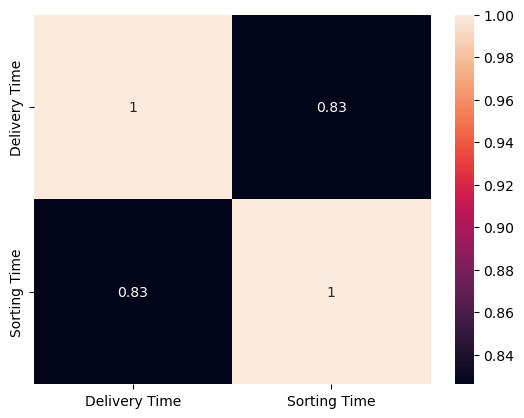

In [283]:
# 1.Heat map

sns.heatmap(df.corr(),annot=True)
plt.show()

We can see that both the features and the label of our dataset are positively correlated with each other.

### Distribution of the dataset

<Axes: xlabel='Delivery Time', ylabel='Count'>

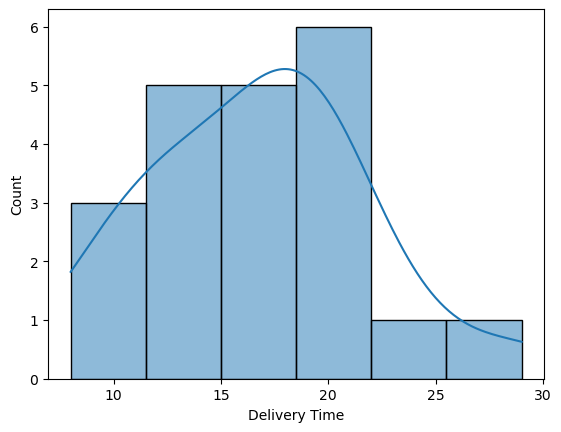

In [285]:
sns.histplot(df['Delivery Time'], kde=True)

<Axes: xlabel='Sorting Time', ylabel='Count'>

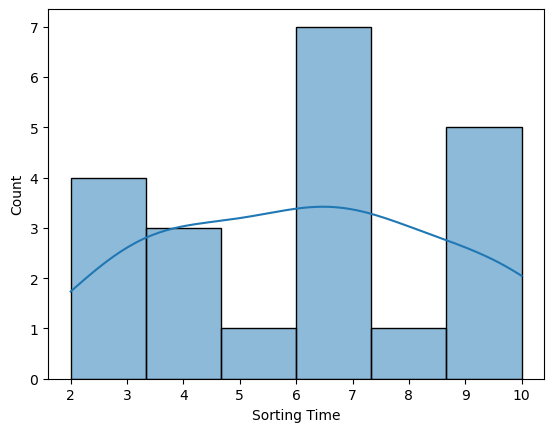

In [287]:
sns.histplot(df['Sorting Time'], kde=True)

<Axes: ylabel='Delivery Time'>

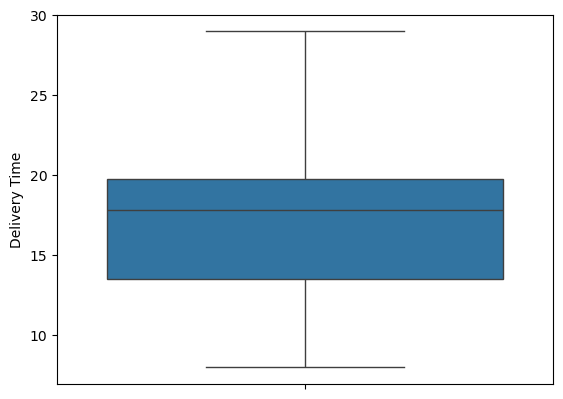

In [103]:
sns.boxplot(df['Delivery Time'])

<Axes: ylabel='Sorting Time'>

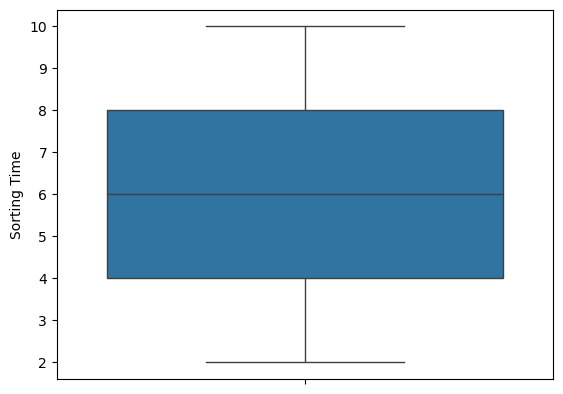

In [101]:
sns.boxplot(df['Sorting Time'])

# Model 1: Linear Regression with statsmodel

In [117]:
import statsmodels.formula.api as smf

In [214]:
df.columns = df.columns.str.replace(' ', '')  # Removing spaces
model = smf.ols("DeliveryTime ~ SortingTime", data=df).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

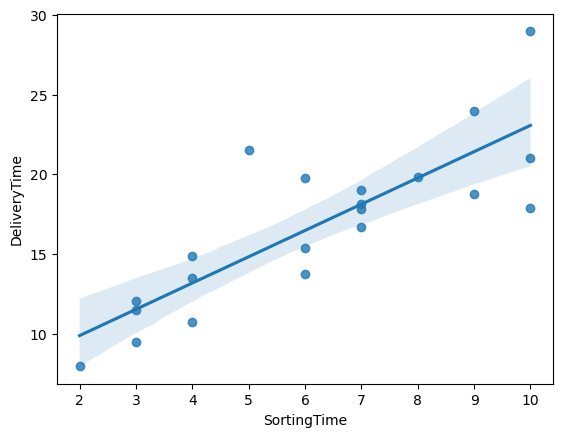

In [127]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=df)

In [129]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [131]:
#t and p values
print(model.tvalues, '\n', '\n', model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [133]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict for new data point

In [138]:
newdata=pd.Series([7])

In [140]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [142]:
model.predict(data_pred)

0    18.125873
dtype: float64

# Model 2: Log transformation

In [147]:
X = df.iloc[:,-1]
y = df.iloc[:,0]

In [149]:
lreg = np.log(X)

In [151]:
lreg.head()

0    2.302585
1    1.386294
2    1.791759
3    2.197225
4    2.302585
Name: SortingTime, dtype: float64

In [157]:
df_drop = df.drop(['SortingTime'],axis=1) #dropping the sorting time

In [195]:
df_concat = pd.concat([lreg, df_drop],axis=1) #concatenating previous sortingtime
df_concat.head()

,SortingTime,DeliveryTime
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00


In [161]:
model2 = model = smf.ols("DeliveryTime ~ SortingTime", data=df_concat).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

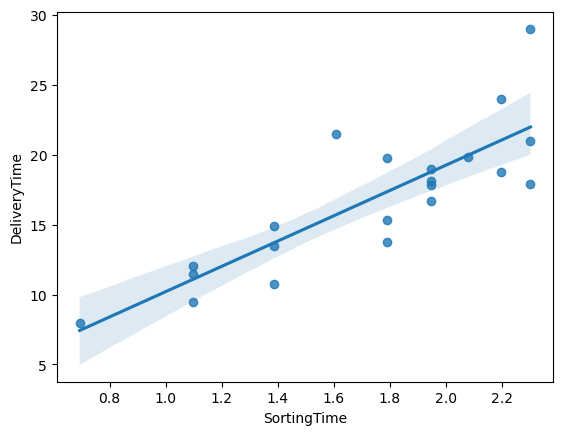

In [163]:
sns.regplot(x = 'SortingTime', y = 'DeliveryTime', data=df_concat)

In [165]:
#Coefficients
model2.params

Intercept      1.159684
SortingTime    9.043413
dtype: float64

In [167]:
#t and p values
print(model2.tvalues, '\n', '\n', model2.pvalues)

Intercept      0.472460
SortingTime    6.586789
dtype: float64 
 
 Intercept      0.641980
SortingTime    0.000003
dtype: float64


In [169]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

### Prediction for new data point with Model 2

In [172]:
newdata2=pd.Series([7])

In [174]:
data_pred2=pd.DataFrame(newdata2,columns=['SortingTime'])

In [176]:
model2.predict(data_pred2)

0    64.463578
dtype: float64

# Model 3: Sqrt transformation

In [181]:
Sreg = np.sqrt(X)

In [183]:
Sreg.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: SortingTime, dtype: float64

In [187]:
df_drop = df.drop(['SortingTime'],axis=1) #dropping the sorting time

In [189]:
df_concat2 = pd.concat([Sreg, df_drop],axis=1) #concatenating previous sortingtime
df_concat2.head()

,SortingTime,DeliveryTime
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00


In [191]:
model3 = model = smf.ols("DeliveryTime ~ SortingTime", data=df_concat2).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

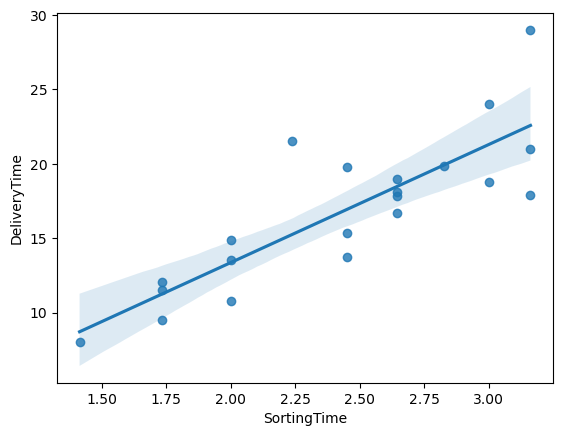

In [193]:
sns.regplot(x = 'SortingTime', y = 'DeliveryTime', data=df_concat2)

In [197]:
#Coefficients
model3.params

Intercept     -2.518837
SortingTime    7.936591
dtype: float64

In [199]:
#t and p values
print(model3.tvalues, '\n', '\n', model3.pvalues)

Intercept     -0.840911
SortingTime    6.592434
dtype: float64 
 
 Intercept      0.410857
SortingTime    0.000003
dtype: float64


In [201]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

### Prediction for new data point with Model 3

In [206]:
newdata3=pd.Series([7])

In [210]:
data_pred3=pd.DataFrame(newdata3,columns=['SortingTime'])

In [212]:
model3.predict(data_pred3)

0    53.037299
dtype: float64

# Model 4: Sklearn model

In [29]:
# Splitting the dataset
X = df.iloc[:,-1].values.reshape(-1,1) #feature
y = df.iloc[0:,0].values.reshape(-1,1) #label

In [31]:
# Step 2 : Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

In [33]:
# Step 3 : Fit Simple Linear Regression to Training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
# Step 4 : Make Prediction
y_pred = regressor.predict(X_test)

# Visualizing the training set

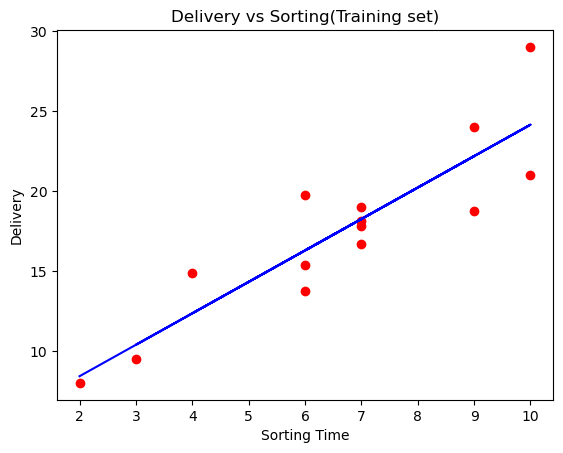

In [37]:
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Delivery vs Sorting(Training set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')
plt.show()

# Visualizing the test set

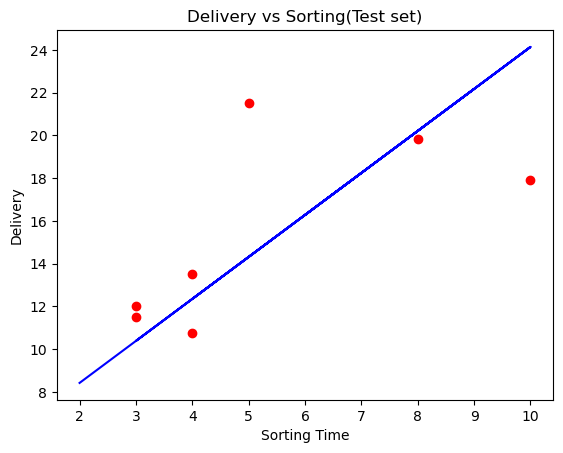

In [39]:
# Step 6 : Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Delivery vs Sorting(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')
plt.show()

In [41]:
from sklearn.metrics import r2_score

#R squared values
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.7917489342165316


### Make new predictions

In [242]:
# Step 7 - Make new prediction
new_delivery_pred = regressor.predict([[7]])

print('Predicted Delivery time is: ', new_delivery_pred)

Predicted Delivery time is:  [[18.2446346]]


In [244]:
# Predicting all the Delivery_Times
# Predicting the Test set results
new_delivery_pred4 = regressor.predict(X_test)
print('Prediicted Delivery_Times are: ', new_delivery_pred4)

Prediicted Delivery_Times are:  [[24.13956522]
 [10.3847271 ]
 [14.31468085]
 [12.34970398]
 [12.34970398]
 [20.20961147]
 [10.3847271 ]]


# R square and Predicted values for Model 1, Model 2, Model 3
- R square values of 68%, 69% and 79% for Model with different transformations.
- For a Sorting time of 7 th predicted delivery time is __18__, __64__, __53__.